In [2]:
## Uge 10 - Opgave 3

## notebook_4 er at finde om et billede indeholder human

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("./data/train/train.csv")
test_data = pd.read_csv("./data/test/test.csv")
sample_submission = pd.read_csv("./data/test/sample_submission.csv")

Human            1.000000
Occlusion        0.634381
Near             0.065215
Eyes             0.036046
Face             0.024170
Info             0.018171
Collage          0.011476
Pawpularity      0.003983
Action          -0.009429
Blur            -0.015941
Accessory       -0.041745
Subject Focus   -0.075295
Group           -0.104287
Name: Human, dtype: float64


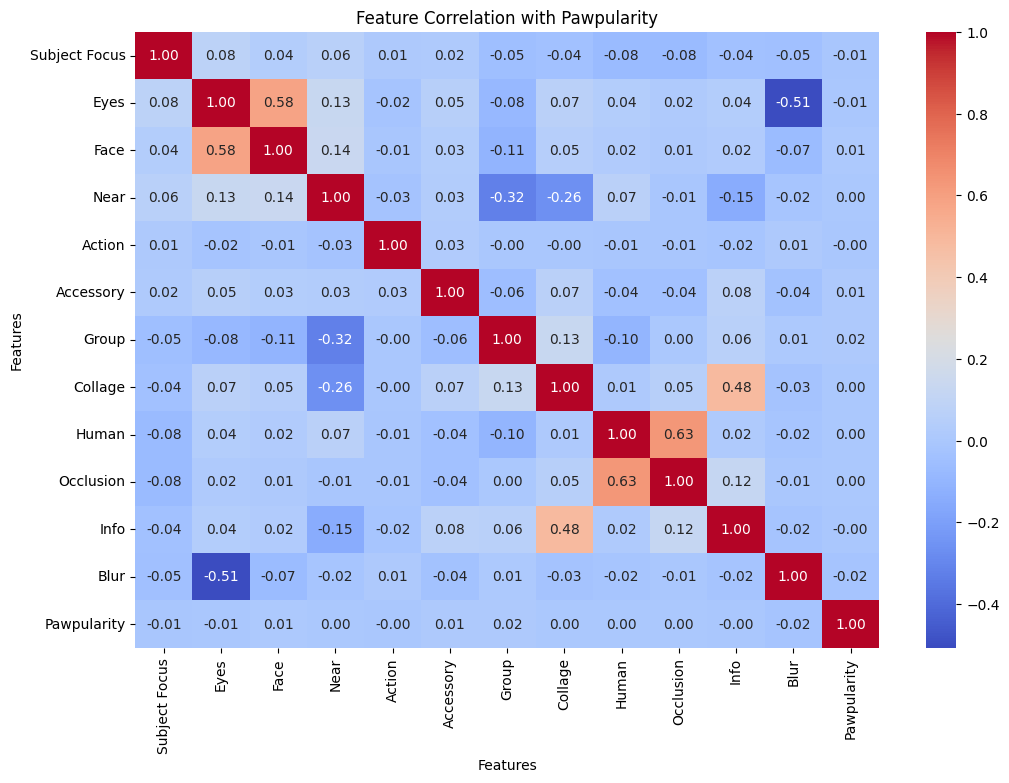

In [3]:
# Prepare the data

X_train = train_data.drop(['Id'], axis=1)
X_test = test_data.drop(['Id'], axis=1)
y_train = train_data['Human']

# heatmap
train_data_for_corr = X_train.copy()
train_data_for_corr['Human'] = y_train

correlation_matrix = train_data_for_corr.corr()

pawpularity_correlation = correlation_matrix['Human'].sort_values(ascending=False)
print(pawpularity_correlation)

correlation_matrix = train_data_for_corr.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Feature Correlation with Pawpularity')
plt.xlabel('Features')
plt.ylabel('Features')


plt.show()

In [4]:

##  Transform the data

# Drop the columns not to be used
correlated_data = train_data.drop(columns=['Id', 'Pawpularity', 'Action', 'Accessory', 'Near', 'Collage', 'Eyes', 'Face', 'Info', 'Subject Focus', 'Blur'], axis=1)

df = pd.DataFrame(correlated_data)

# Split the data into training and testing sets (test_size=0.2 means that 20% of the data will be used for testing)
X = df.drop('Human', axis=1)
y = df['Human']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Check the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9102370146243066


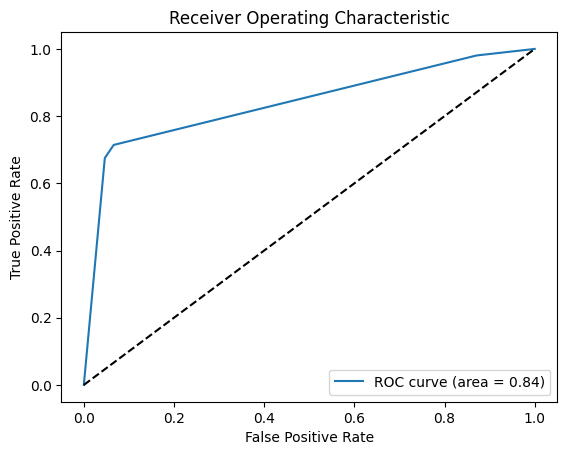

In [5]:
#ROC Curve
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your data is already loaded and split into X_train, y_train

# Step 3: Create a logistic regression classifier
classifier = LogisticRegression()

# Step 4: Train the classifier
classifier.fit(X_train, y_train)

# Step 5: Get predicted probabilities
y_pred_prob = classifier.predict_proba(X_test)[:,1]

# Step 6: Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()